# GROUP 6 : ANALYSIS OF BOUNDARY LAYER HEIGHTS FOR KUMASI

# Importing Libraries

In [1]:
import xarray as xr                                     # Import xarray for handling netCDF data and plotting
import cartopy.crs as ccrs                              # Import cartopy's coordinate reference system module for map projections
import cartopy.feature as cfeature                      # Import cartopy's feature module for adding geographical features
import matplotlib.pyplot as plt                         # Import matplotlib's plotting module for creating visualizations
import matplotlib.dates as mdates                       # Import matplotlib's date handling module for formatting and manipulating time axes
from matplotlib.ticker import AutoMinorLocator          # Import AutoMinorLocator for automatically setting minor ticks on axes
import numpy as np                                      # Numpy is needed for np.timedelta64 operations


# Dataset Inspection

In [2]:
dataset = xr.open_mfdataset('*.nc')  # Uses xarray to open the NetCDF file and load it as a Dataset object.
dataset

<xarray.Dataset> Size: 527kB
Dimensions:     (valid_time: 24, latitude: 29, longitude: 21)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 192B 2000-01-01 ... 2000-01-01T23...
  * latitude    (latitude) float64 232B 11.5 11.25 11.0 10.75 ... 5.0 4.75 4.5
  * longitude   (longitude) float64 168B -3.5 -3.25 -3.0 -2.75 ... 1.0 1.25 1.5
    expver      (valid_time) <U4 384B dask.array<chunksize=(24,), meta=np.ndarray>
Data variables:
    blh         (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
    tcc         (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
    d2m         (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
    u10         (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
    sshf        (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
    ssrd        (valid_time, latitude, longitude) float32 58kB dask.array<chunksize=(24, 29, 21), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-02T11:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
dataset.tp.attrs # Accessing the attributes (metadata) of the blh variable (DataArray) to determine the units.

{'GRIB_paramId': 228,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 609,
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'accum',
 'GRIB_gridType': 'regular_ll',
 'GRIB_uvRelativeToGrid': 0,
 'GRIB_NV': 0,
 'GRIB_Nx': 21,
 'GRIB_Ny': 29,
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 'tp',
 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid',
 'GRIB_iDirectionIncrementInDegrees': 0.25,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.25,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 0,
 'GRIB_latitudeOfFirstGridPointInDegrees': 11.5,
 'GRIB_latitudeOfLastGridPointInDegrees': 4.5,
 'GRIB_longitudeOfFirstGridPointInDegrees': -3.5,
 'GRIB_longitudeOfLastGridPointInDegrees': 1.5,
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': 'Total precipitation',
 'GRIB_shortName': 'tp',
 'GRIB_totalNumber': 0,
 'GRIB_units': 'm',
 'long_name': 'Total precipitation',
 'units': 'm',
 'standard_name': 'unknown',
 'GRIB_surface'

In [4]:
#tema1_tp.attrs

# Drawing of Map

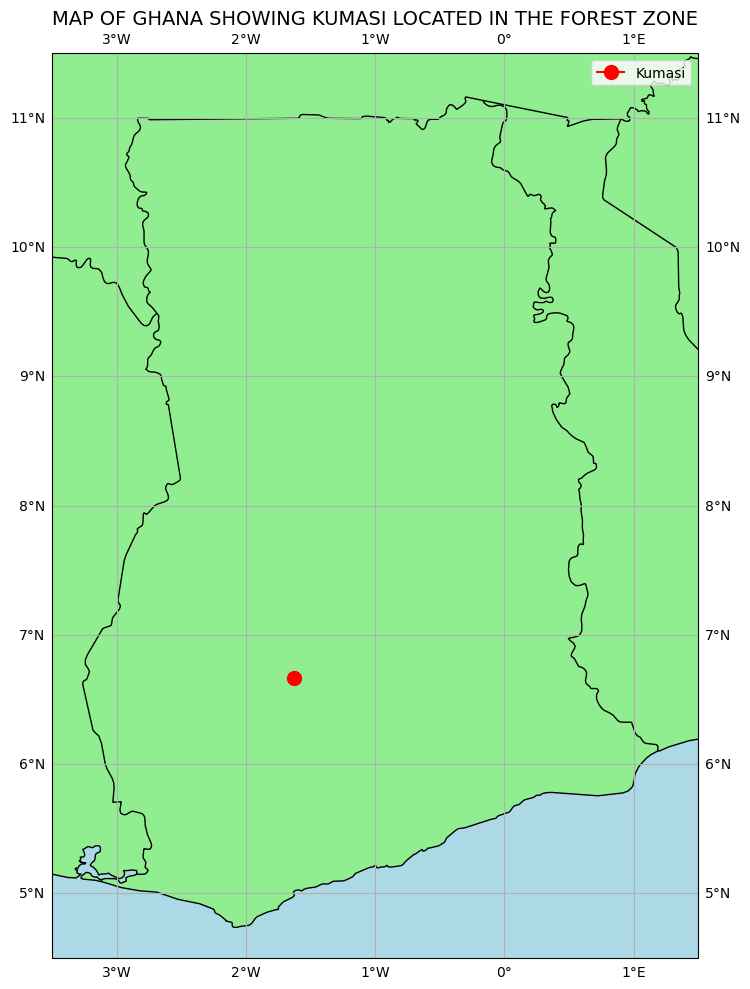

In [6]:
plt.figure(figsize=(8, 10))                                       # Create a new figure with a size of 8 inches by 10 inches
ax = plt.axes(projection=ccrs.PlateCarree())                     # Create axes with PlateCarree projection
ax.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())    # Set the map extent to Ghana’s bounding box



ax.add_feature(cfeature.COASTLINE)                               # Add coastline outlines to the map
ax.add_feature(cfeature.BORDERS)                                 # Add country borders to the map
ax.add_feature(cfeature.LAND, facecolor='lightgreen')            # Add land areas with a light green fill color
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')            # Add ocean areas with a light blue fill color


# Plot a red circular marker for Tema at longitude 0.02680 and latitude 5.73537
ax.plot(-1.6312341833777726, 6.665506463867306, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree(), label='Kumasi')

# Plot a blue circular marker for Navrongo at longitude -1.09254 and latitude 10.89433
#ax.plot(-1.09254, 10.89433, marker='o', markersize=10, color='blue', transform=ccrs.PlateCarree(), label='Navrongo')

# transform=ccrs.PlateCarree() ensures coordinates are interpreted as latitude/longitude in the PlateCarree projection
# label='Tema' and label='Navrongo' set legend labels for each point


ax.gridlines(draw_labels=True)                                   # Add gridlines for latitude and longitude with labels on the axes
                                                                 # draw_labels=True automatically adds latitude/longitude labels on the map’s edges


plt.title('MAP OF GHANA SHOWING KUMASI LOCATED IN THE FOREST ZONE', fontsize=14)  # Set the map title with a font size of 14
plt.legend()                                                       # Add a legend to display labels for Tema and Navrongo markers
plt.tight_layout()                                                 # Adjust the layout to prevent clipping of labels and ensure proper spacing
plt.show()                                                         # Display the map on the screen

# Extracting Boundary Layer Height Data for Kumasi

In [7]:
# Select the nearest data point to Navrongo and Tema.
# The blh variable is an xarray DataArray hence '.values' converts it to a NumPy array containing only the blh values.
# This is to check for consistent values (No NANs)
#navrongo = dataset.blh.sel(latitude=10.89433, longitude=-1.09254, method='nearest').values
#tema = dataset.blh.sel(latitude=5.73537, longitude=0.02680, method='nearest').values

# Extract boundary layer height (blh) data for Navrongo and Tema as an xarray DataArray
# This retains metadata (coordinates, units) and time dimensions for further processing
kumasi = dataset.blh.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')
#tema1 = dataset.blh.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [9]:
kumasi_sshf = dataset.sshf.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')
#tema1_sshf = dataset.sshf.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [10]:
kumasi_ssrd = dataset.ssrd.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')
#tema1_ssrd = dataset.ssrd.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [11]:
kumasi_d2m = dataset.d2m.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')
#tema1_d2m = dataset.d2m.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [12]:
kumasi_t2m = dataset.t2m.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')
#tema1_t2m = dataset.t2m.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [13]:
kumasi_tcc = dataset.tcc.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')
#tema1_tcc = dataset.tcc.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [14]:
kumasi_tp = dataset.tp.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')
#tema1_tp = dataset.tp.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [39]:
u10 = dataset.u10.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')
v10 = dataset.v10.sel(latitude=6.665506463867306, longitude=-1.6312341833777726, method='nearest')

In [14]:
#tema1_u10 = dataset.u10.sel(latitude=5.73537, longitude=0.02680, method='nearest')
#tema1_v10 = dataset.v10.sel(latitude=5.73537, longitude=0.02680, method='nearest')


In [40]:
valid_times = u10['valid_time'].values

In [16]:
kumasi.values

array([ 471.2729 ,  463.9647 ,  442.68225,  432.82877,  438.87927,
        444.2047 ,  456.17838,  465.547  ,  475.16022,  490.1259 ,
        684.85645,  875.0762 ,  994.3528 , 1119.6809 , 1370.0625 ,
       1415.0588 , 1190.2043 ,  497.99396,  456.95056,  423.7375 ,
        311.84164,  240.88379,  207.98186,  219.6895 ], dtype=float32)

In [17]:
#tema

# Time Series Plot

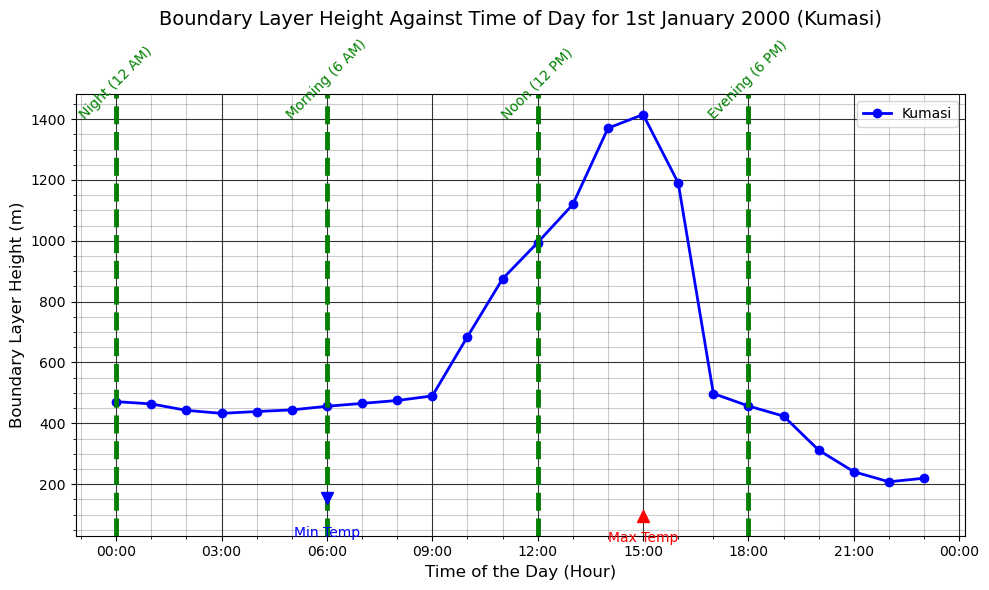

In [18]:
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches wide, 6 inches in height.


kumasi.plot(label='Kumasi', color='blue', marker='o', linewidth=2)  # Plot Kumasi data with a blue line, circular markers, and line width of 2

#tema1.plot(label='Tema', color='red', marker='s', linewidth=2)  # Plot Tema data with a red line, square markers, and line width of 2


plt.title('Boundary Layer Height Against Time of Day for 1st January 2000 (Kumasi)', fontsize=14, pad=50)  # Set plot title with font size 14 and padding of 50
                                                                             # - pad=50 adds space above the title to avoid overlap with the plot

plt.xlabel('Time of the Day (Hour)', fontsize=12)  # Label x-axis with font size 12

plt.ylabel('Boundary Layer Height (m)', fontsize=12)  # Label y-axis with font size 12



ax = plt.gca()  # - plt.gca() (get current axis) retrieves the axes object created by xarray’s .plot() method for customization
                # - Allows direct manipulation of axis properties like ticks, grid, and annotations

# Format time on x-axis
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3)) # - mdates.HourLocator(interval=3) places major ticks at 3-hour intervals on the xaxis
                                                           # - Matches the dataset’s 12 AM to 12 AM time range

ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1)) # - Adds minor ticks at 1-hour intervals for detailed analysis.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # - Converts x-axis tick labels to time-of-day format (hours:minutes)
                                                             # - Since the dataset spans one day, only the time part is shown, ignoring the date


ax.yaxis.set_minor_locator(AutoMinorLocator())  # Add minor ticks on the y-axis automatically
                                                # - Enhances readability of boundary layer height values without manually specifying tick locations


ax.grid(True, which='major', color='black', linestyle='-', alpha=0.8)  # Add major grid with black solid lines and 80% opacity

ax.grid(True, which='minor', color='black', linestyle='-', alpha=0.2)  # Add minor grid with black solid lines and 20% opacity

# Diurnal key times
diurnal_times = {
    'Night (12 AM)': kumasi.valid_time.values[0],                            # 12:00 AM (start of the dataset)
    'Morning (6 AM)': kumasi.valid_time.values[0] + np.timedelta64(6, 'h'),  # 6:00 AM
    'Noon (12 PM)': kumasi.valid_time.values[0] + np.timedelta64(12, 'h'),   # 12:00 PM
    'Evening (6 PM)': kumasi.valid_time.values[0] + np.timedelta64(18, 'h')  # 6:00 PM
}
# - Defines a dictionary mapping diurnal time labels to numpy.datetime64 objects
# - navrongo1.valid_time.values[0] is the first time in the dataset, 12:00 AM (2020-01-01T00:00:00)
# - np.timedelta64(X, 'h') adds X hours to the starting time (a numpy.datetime64 object)
# - Since the dataset spans 12 AM to 12 AM, these times align with the x-axis

# Add vertical lines for diurnal times
for label, time in diurnal_times.items():  # Iterate through the diurnal_times dictionary
    ax.axvline(time, color='green', linestyle='--', linewidth=3.5)  # - ax.axvline() draws a vertical line across the plot at the specified x-axis value (time)

    ax.text(time, ax.get_ylim()[1] * 0.95, label, rotation=45, fontsize=10, color='green', ha='center')  # Add a text label
    # - Places the label (e.g., 'Morning (6 AM)') at the specified time, at 95% of the y-axis height
    # - rotation=45 tilts the text for readability
    # - fontsize=10 and color='green' match the line style; ha='center' centers the text on the line

# Temperature markers
min_temp_time = kumasi.valid_time.values[0] + np.timedelta64(6, 'h')  # Define 6:00 AM for minimum temperature

max_temp_time = kumasi.valid_time.values[0] + np.timedelta64(15, 'h')  # Define 3:00 PM for maximum temperature


ax.plot(min_temp_time, ax.get_ylim()[0] * 1.05, 'bv', markersize=8)  # Plot blue downward triangle at min temp time
                                                                     # - Plots a marker at 6 AM, slightly above the y-axis minimum 
                                                                     # - 'bv' specifies a blue ('b') downward triangle ('v'); markersize=8 sets the size

ax.plot(max_temp_time, ax.get_ylim()[0] * 1.05, 'r^', markersize=8)  # Plot red upward triangle at max temp time
                                                                     # - Plots a marker at 3 PM, slightly above the y-axis minimum
                                                                     # - 'r^' specifies a red ('r') upward triangle ('^')

ax.text(min_temp_time, ax.get_ylim()[0] * 0.9, 'Min Temp', color='blue', ha='center')  # Adds a text label at a specific position on the plot.
                                                                                       # min_temp_time: X-axis position - 6:00 AM 
                                                         # ax.get_ylim()[0] * 0.9: Y-axis position from bottom - Starts from 90% of the minimum Y-value.
                                                         # color='blue': Makes the label blue to match the marker.
                                                         # ha='center': Horizontally aligns the text to the center of the X value (min_temp_time).

ax.text(max_temp_time, ax.get_ylim()[0] * 0.3, 'Max Temp', color='red', ha='center')  # Positions the text from 30% of the minimum Y-value


plt.legend()                             # Add a legend to identify Navrongo and Tema lines
plt.tight_layout()                       # Adjust layout to prevent clipping of labels and ensure proper spacing
plt.show()                               # Display the plot 


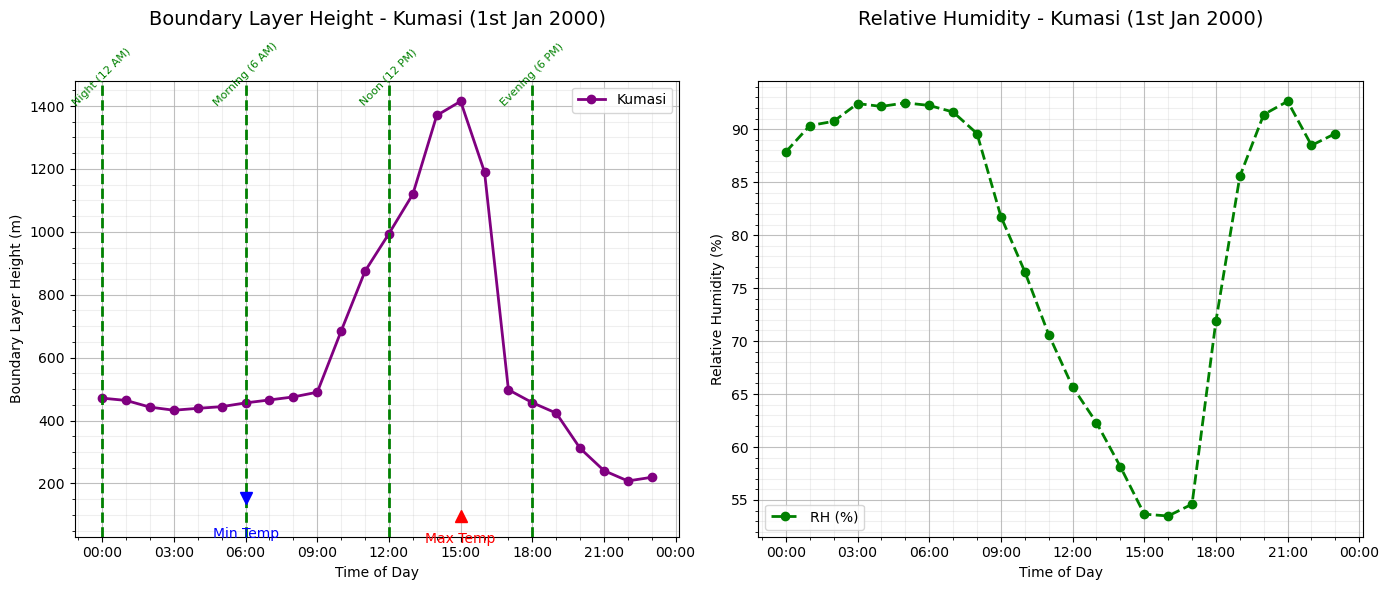

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# ----------------------------
# Left Plot: BLH for Kumasi
# ----------------------------
kumasi.plot(ax=axs[0], label='Kumasi', color='purple', marker='o', linewidth=2)
axs[0].set_title('Boundary Layer Height - Kumasi (1st Jan 2000)', fontsize=14, pad=40)
axs[0].set_xlabel('Time of Day')
axs[0].set_ylabel('Boundary Layer Height (m)')
axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axs[0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].grid(True, which='major', linestyle='-', alpha=0.8)
axs[0].grid(True, which='minor', linestyle='-', alpha=0.2)
axs[0].legend()

# Diurnal markers
diurnal_times = {
    'Night (12 AM)': kumasi.valid_time.values[0],
    'Morning (6 AM)': kumasi.valid_time.values[0] + np.timedelta64(6, 'h'),
    'Noon (12 PM)': kumasi.valid_time.values[0] + np.timedelta64(12, 'h'),
    'Evening (6 PM)': kumasi.valid_time.values[0] + np.timedelta64(18, 'h')
}

for label, time in diurnal_times.items():
    axs[0].axvline(time, color='green', linestyle='--', linewidth=2)
    axs[0].text(time, axs[0].get_ylim()[1]*0.95, label, rotation=45, fontsize=8, color='green', ha='center')

# Temp markers
min_temp_time = kumasi.valid_time.values[0] + np.timedelta64(6, 'h')
max_temp_time = kumasi.valid_time.values[0] + np.timedelta64(15, 'h')
axs[0].plot(min_temp_time, axs[0].get_ylim()[0]*1.05, 'bv', markersize=8)
axs[0].plot(max_temp_time, axs[0].get_ylim()[0]*1.05, 'r^', markersize=8)
axs[0].text(min_temp_time, axs[0].get_ylim()[0]*0.9, 'Min Temp', color='blue', ha='center')
axs[0].text(max_temp_time, axs[0].get_ylim()[0]*0.3, 'Max Temp', color='red', ha='center')


# ----------------------------
# Right Plot: Relative Humidity for Kumasi
# ----------------------------

# Calculate RH from 2m temp and dewpoint temp
T_2m_kumasi_C = kumasi_t2m - 273.15
Td_2m_kumasi_C = kumasi_d2m - 273.15

rh_kumasi = 100 * (np.exp((17.625 * Td_2m_kumasi_C) / (243.04 + Td_2m_kumasi_C)) /
                   np.exp((17.625 * T_2m_kumasi_C) / (243.04 + T_2m_kumasi_C)))

axs[1].plot(kumasi_t2m.valid_time, rh_kumasi, label='RH (%)', color='green', marker='o', linestyle='--', linewidth=2)
axs[1].set_title('Relative Humidity - Kumasi (1st Jan 2000)', fontsize=14, pad=40)
axs[1].set_xlabel('Time of Day')
axs[1].set_ylabel('Relative Humidity (%)')
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axs[1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].grid(True, which='major', linestyle='-', alpha=0.8)
axs[1].grid(True, which='minor', linestyle='-', alpha=0.2)
axs[1].legend()

plt.tight_layout()
plt.show()


In [22]:


# fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Create 2x2 subplots

# # ----------------------------
# # Top-Left: BLH for Tema
# # ----------------------------
# tema1.plot(ax=axs[0, 0], label='Tema', color='red', marker='s', linewidth=2)
# axs[0, 0].set_title('Boundary Layer Height Against Time of Day for 1st January 2000', fontsize=14, pad=50)
# axs[0, 0].set_xlabel('Time of Day')
# axs[0, 0].set_ylabel('Boundary Layer Height (m)')
# axs[0, 0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[0, 0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[0, 0].yaxis.set_minor_locator(AutoMinorLocator())
# axs[0, 0].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[0, 0].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
# axs[0, 0].legend()

# # ----------------------------
# # Bottom-Left: BLH for Navrongo
# # ----------------------------
# navrongo1.plot(ax=axs[1, 0], label='Navrongo', color='blue', marker='o', linewidth=2)
# axs[1, 0].set_title('Boundary Layer Height Against Time of Day for 1st January 2000', fontsize=14, pad=50)
# axs[1, 0].set_xlabel('Time of Day')
# axs[1, 0].set_ylabel('Boundary Layer Height (m)')
# axs[1, 0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[1, 0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[1, 0].yaxis.set_minor_locator(AutoMinorLocator())
# axs[1, 0].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[1, 0].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
# axs[1, 0].legend()

# # Diurnal time markers 
# diurnal_times = {
#     'Night (12 AM)': navrongo1.valid_time.values[0],
#     'Morning (6 AM)': navrongo1.valid_time.values[0] + np.timedelta64(6, 'h'),
#     'Noon (12 PM)': navrongo1.valid_time.values[0] + np.timedelta64(12, 'h'),
#     'Evening (6 PM)': navrongo1.valid_time.values[0] + np.timedelta64(18, 'h')
# }

# for label, time in diurnal_times.items():
#     for ax in [axs[0, 0], axs[1, 0]]:
#         ax.axvline(time, color='green', linestyle='--', linewidth=2.5)
#         ax.text(time, ax.get_ylim()[1]*0.95, label, rotation=45, fontsize=8, color='green', ha='center')


# min_temp_time = navrongo1.valid_time.values[0] + np.timedelta64(6, 'h')
# max_temp_time = navrongo1.valid_time.values[0] + np.timedelta64(15, 'h')
# axs[1, 0].plot(min_temp_time, axs[1, 0].get_ylim()[0]*1.05, 'bv', markersize=8)
# axs[1, 0].plot(max_temp_time, axs[1, 0].get_ylim()[0]*1.05, 'r^', markersize=8)
# axs[1, 0].text(min_temp_time, axs[1, 0].get_ylim()[0]*0.9, 'Min Temp', color='blue', ha='center')
# axs[1, 0].text(max_temp_time, axs[1, 0].get_ylim()[0]*0.3, 'Max Temp', color='red', ha='center')


# # ----------------------------
# # Top-Right: RH (Tema)
# # ----------------------------

# # Calculate RH for Tema using August-Roche-Magnus formula
# T_2m_tema_C = tema1_t2m - 273.15
# Td_2m_tema_C = tema1_d2m - 273.15
# rh_tema = 100 * (np.exp((17.625 * Td_2m_tema_C) / (243.04 + Td_2m_tema_C)) /
#                  np.exp((17.625 * T_2m_tema_C) / (243.04 + T_2m_tema_C)))

# axs[0, 1].plot(tema1_t2m.valid_time, rh_tema, label='RH (%)', color='green', marker='o', linestyle='--', linewidth=2)
# axs[0, 1].set_title('Relative Humidity Against Time - Tema', fontsize=12)
# axs[0, 1].set_xlabel('Time of Day')
# axs[0, 1].set_ylabel('Relative Humidity (%)')
# axs[0, 1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[0, 1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[0, 1].yaxis.set_minor_locator(AutoMinorLocator())
# axs[0, 1].grid(True, which='major', linestyle='-', alpha=0.8)
# axs[0, 1].grid(True, which='minor', linestyle='-', alpha=0.2)
# axs[0, 1].legend()



# # ----------------------------
# # Bottom-Right: RH (Navrongo)
# # ----------------------------

# # Calculate RH for Navrongo
# T_2m_nav_C = navrongo1_t2m - 273.15
# Td_2m_nav_C = navrongo1_d2m - 273.15
# rh_nav = 100 * (np.exp((17.625 * Td_2m_nav_C) / (243.04 + Td_2m_nav_C)) /
#                 np.exp((17.625 * T_2m_nav_C) / (243.04 + T_2m_nav_C)))

# axs[1, 1].plot(navrongo1_d2m.valid_time, rh_nav, label='RH (%)', marker='o',color='green', linestyle='--', linewidth=2)
# axs[1, 1].set_title('Relative Humidity Against Time - Navrongo', fontsize=12)
# axs[1, 1].set_xlabel('Time of Day')
# axs[1, 1].set_ylabel('Relative Humidity (%)')
# axs[1, 1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[1, 1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[1, 1].yaxis.set_minor_locator(AutoMinorLocator())
# axs[1, 1].grid(True, which='major', linestyle='-', alpha=0.8)
# axs[1, 1].grid(True, which='minor', linestyle='-', alpha=0.2)
# axs[1, 1].legend()



# plt.tight_layout()
# plt.show()


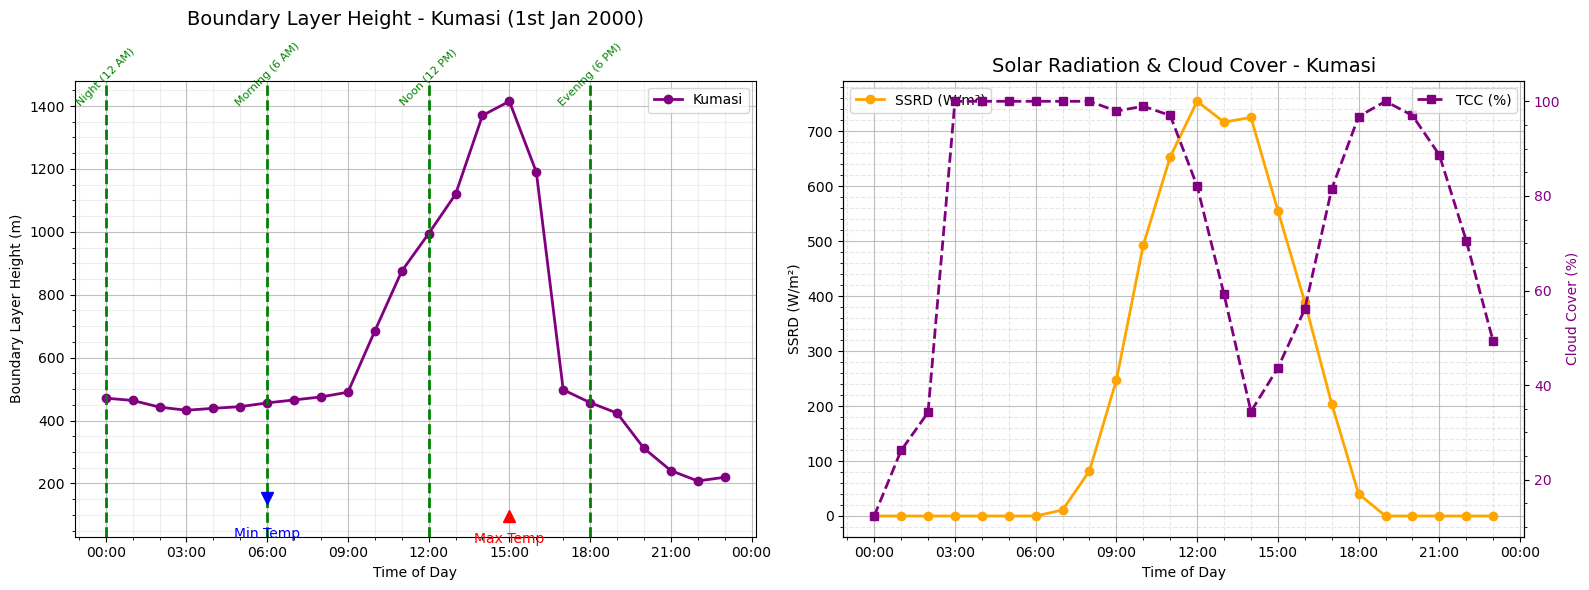

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Create 1 row, 2 columns

# ===========================
# Plot 1: BLH (Kumasi or any city)
# ===========================
kumasi.plot(ax=axs[0], label='Kumasi', color='purple', marker='o', linewidth=2)
axs[0].set_title('Boundary Layer Height - Kumasi (1st Jan 2000)', fontsize=14, pad=40)
axs[0].set_xlabel('Time of Day')
axs[0].set_ylabel('Boundary Layer Height (m)')
axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axs[0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].grid(True, which='major', linestyle='-', alpha=0.8)
axs[0].grid(True, which='minor', linestyle='-', alpha=0.2)
axs[0].legend()

# Diurnal markers
diurnal_times = {
    'Night (12 AM)': kumasi.valid_time.values[0],
    'Morning (6 AM)': kumasi.valid_time.values[0] + np.timedelta64(6, 'h'),
    'Noon (12 PM)': kumasi.valid_time.values[0] + np.timedelta64(12, 'h'),
    'Evening (6 PM)': kumasi.valid_time.values[0] + np.timedelta64(18, 'h')
}

for label, time in diurnal_times.items():
    axs[0].axvline(time, color='green', linestyle='--', linewidth=2)
    axs[0].text(time, axs[0].get_ylim()[1]*0.95, label, rotation=45, fontsize=8, color='green', ha='center')

# Temp markers
min_temp_time = kumasi.valid_time.values[0] + np.timedelta64(6, 'h')
max_temp_time = kumasi.valid_time.values[0] + np.timedelta64(15, 'h')
axs[0].plot(min_temp_time, axs[0].get_ylim()[0]*1.05, 'bv', markersize=8)
axs[0].plot(max_temp_time, axs[0].get_ylim()[0]*1.05, 'r^', markersize=8)
axs[0].text(min_temp_time, axs[0].get_ylim()[0]*0.9, 'Min Temp', color='blue', ha='center')
axs[0].text(max_temp_time, axs[0].get_ylim()[0]*0.3, 'Max Temp', color='red', ha='center')
# ===========================
# Plot 2: SSRD + TCC (dual axis)
# ===========================
converted_ssrd_kumasi = kumasi_ssrd / 3600  # J/m² to W/m²

axs[1].plot(kumasi_ssrd.valid_time, converted_ssrd_kumasi, label='SSRD (W/m²)', color='orange', marker='o', linewidth=2)
axs[1].set_title('Solar Radiation & Cloud Cover - Kumasi', fontsize=14)
axs[1].set_xlabel('Time of Day')
axs[1].set_ylabel('SSRD (W/m²)', color='black')
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axs[1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].grid(True, which='major', linestyle='-', alpha=0.8)
axs[1].grid(True, which='minor', linestyle='--', alpha=0.3)

# Twin axis for cloud cover
ax2 = axs[1].twinx()
ax2.plot(kumasi_tcc.valid_time, kumasi_tcc * 100, label='TCC (%)', color='purple', marker='s', linestyle='--', linewidth=2)
ax2.set_ylabel('Cloud Cover (%)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(False)

# Legends
axs[1].legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [27]:


# fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Create 2x2 subplots

# # ----------------------------
# # Top-Left: BLH for Tema
# # ----------------------------
# tema1.plot(ax=axs[0, 0], label='Tema', color='red', marker='s', linewidth=2)
# axs[0, 0].set_title('Boundary Layer Height Against Time of Day for 1st January 2000', fontsize=14, pad=50)
# axs[0, 0].set_xlabel('Time of Day')
# axs[0, 0].set_ylabel('Boundary Layer Height (m)')
# axs[0, 0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[0, 0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[0, 0].yaxis.set_minor_locator(AutoMinorLocator())
# axs[0, 0].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[0, 0].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
# axs[0, 0].legend()

# # ----------------------------
# # Bottom-Left: BLH for Navrongo
# # ----------------------------
# navrongo1.plot(ax=axs[1, 0], label='Navrongo', color='blue', marker='o', linewidth=2)
# axs[1, 0].set_title('Boundary Layer Height Against Time of Day for 1st January 2000', fontsize=14, pad=50)
# axs[1, 0].set_xlabel('Time of Day')
# axs[1, 0].set_ylabel('Boundary Layer Height (m)')
# axs[1, 0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[1, 0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[1, 0].yaxis.set_minor_locator(AutoMinorLocator())
# axs[1, 0].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[1, 0].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
# axs[1, 0].legend()

# # Diurnal time markers 
# diurnal_times = {
#     'Night (12 AM)': navrongo1.valid_time.values[0],
#     'Morning (6 AM)': navrongo1.valid_time.values[0] + np.timedelta64(6, 'h'),
#     'Noon (12 PM)': navrongo1.valid_time.values[0] + np.timedelta64(12, 'h'),
#     'Evening (6 PM)': navrongo1.valid_time.values[0] + np.timedelta64(18, 'h')
# }

# for label, time in diurnal_times.items():
#     for ax in [axs[0, 0], axs[1, 0]]:
#         ax.axvline(time, color='green', linestyle='--', linewidth=2.5)
#         ax.text(time, ax.get_ylim()[1]*0.95, label, rotation=45, fontsize=8, color='green', ha='center')

# # Add min/max temp markers on one of the BLH plots
# min_temp_time = navrongo1.valid_time.values[0] + np.timedelta64(6, 'h')
# max_temp_time = navrongo1.valid_time.values[0] + np.timedelta64(15, 'h')
# axs[1, 0].plot(min_temp_time, axs[1, 0].get_ylim()[0]*1.05, 'bv', markersize=8)
# axs[1, 0].plot(max_temp_time, axs[1, 0].get_ylim()[0]*1.05, 'r^', markersize=8)
# axs[1, 0].text(min_temp_time, axs[1, 0].get_ylim()[0]*0.9, 'Min Temp', color='blue', ha='center')
# axs[1, 0].text(max_temp_time, axs[1, 0].get_ylim()[0]*0.3, 'Max Temp', color='red', ha='center')

# # ----------------------------
# # Top-Right: SSRD + TCC for Tema (with conversion and consistent style)
# # ----------------------------
# converted_ssrd_tema = tema1_ssrd / 3600  # Convert to W/m²

# axs[0, 1].plot(tema1_ssrd.valid_time, converted_ssrd_tema, label='SSRD (W/m²)', marker='o',color='orange', linewidth=2)
# axs[0, 1].set_title('Solar Radiation & Cloud Cover - Tema', fontsize=12)
# axs[0, 1].set_xlabel('Time of Day')
# axs[0, 1].set_ylabel('Solar Radiation (W/m²)', color='black')
# axs[0, 1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[0, 1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[0, 1].yaxis.set_minor_locator(AutoMinorLocator())
# axs[0, 1].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[0, 1].grid(True, which='minor', color='black', linestyle='-', alpha=0.1)

# # Twin axis for TCC
# ax2_ssrd_tcc_tema = axs[0, 1].twinx()
# ax2_ssrd_tcc_tema.plot(tema1_tcc.valid_time, tema1_tcc * 100, label='TCC (%)', marker='o', color='purple', linestyle='--', linewidth=2)
# ax2_ssrd_tcc_tema.set_ylabel('Total Cloud Cover (%)', color='purple')
# ax2_ssrd_tcc_tema.tick_params(axis='y', labelcolor='purple')
# ax2_ssrd_tcc_tema.yaxis.set_minor_locator(AutoMinorLocator())
# ax2_ssrd_tcc_tema.grid(False)

# # Legends
# axs[0, 1].legend(loc='upper left')
# ax2_ssrd_tcc_tema.legend(loc='upper right')


# # ----------------------------
# # Bottom-Right: SSRD + TCC for Navrongo (with conversion and consistent style)
# # ----------------------------
# converted_ssrd_nav = navrongo1_ssrd / 3600  # Convert to W/m²

# axs[1, 1].plot(navrongo1_ssrd.valid_time, converted_ssrd_nav, label='SSRD (W/m²)', marker='o', color='orange', linewidth=2)
# axs[1, 1].set_title('Solar Radiation & Cloud Cover - Navrongo', fontsize=12)
# axs[1, 1].set_xlabel('Time of Day')
# axs[1, 1].set_ylabel('Solar Radiation (W/m²)', color='black')
# axs[1, 1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[1, 1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[1, 1].yaxis.set_minor_locator(AutoMinorLocator())
# axs[1, 1].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[1, 1].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)

# # Twin axis for TCC
# ax2_ssrd_tcc_nav = axs[1, 1].twinx()
# ax2_ssrd_tcc_nav.plot(navrongo1_tcc.valid_time, navrongo1_tcc * 100, label='TCC (%)', marker='o',color='purple', linestyle='--', linewidth=2)
# ax2_ssrd_tcc_nav.set_ylabel('Total Cloud Cover (%)', color='purple')
# ax2_ssrd_tcc_nav.tick_params(axis='y', labelcolor='purple')
# ax2_ssrd_tcc_nav.yaxis.set_minor_locator(AutoMinorLocator())
# ax2_ssrd_tcc_nav.grid(False)

# # Legends
# axs[1, 1].legend(loc='upper left')
# ax2_ssrd_tcc_nav.legend(loc='upper right')



# plt.tight_layout()
# plt.show()


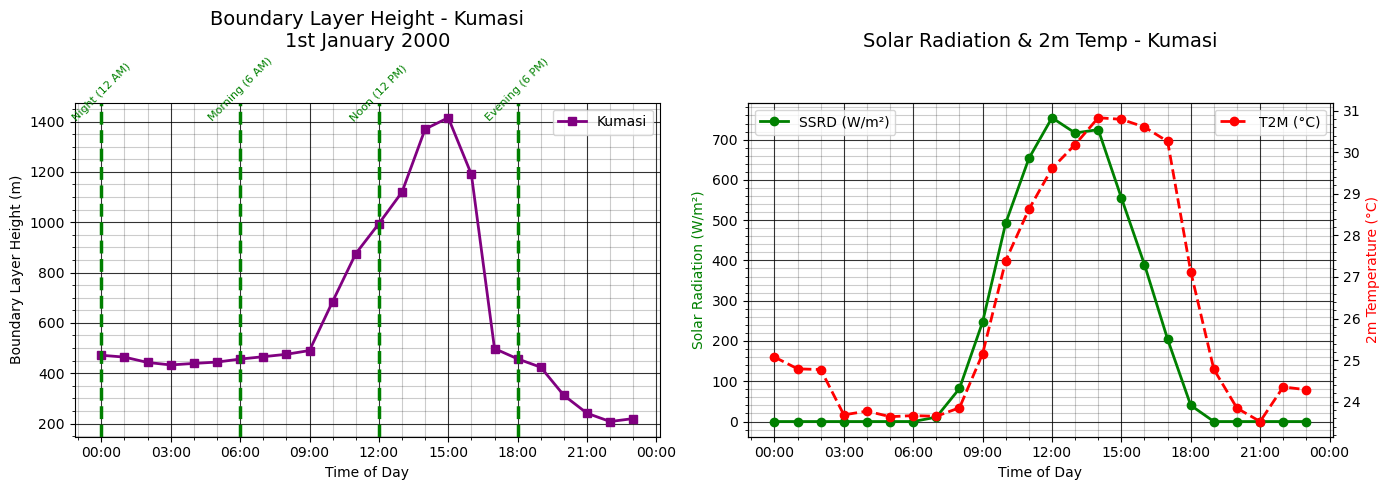

In [32]:


# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # Only two plots

# ----------------------------
# Left: BLH for Kumasi
# ----------------------------
kumasi.plot(ax=axs[0], label='Kumasi', color='purple', marker='s', linewidth=2)
axs[0].set_title('Boundary Layer Height - Kumasi\n1st January 2000', fontsize=14,pad=40)
axs[0].set_xlabel('Time of Day')
axs[0].set_ylabel('Boundary Layer Height (m)')
axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axs[0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
axs[0].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
axs[0].legend()

# Optional: Diurnal time markers
diurnal_times = {
    'Night (12 AM)': kumasi.valid_time.values[0],
    'Morning (6 AM)': kumasi.valid_time.values[0] + np.timedelta64(6, 'h'),
    'Noon (12 PM)': kumasi.valid_time.values[0] + np.timedelta64(12, 'h'),
    'Evening (6 PM)': kumasi.valid_time.values[0] + np.timedelta64(18, 'h')
}
for label, time in diurnal_times.items():
    axs[0].axvline(time, color='green', linestyle='--', linewidth=2.5)
    axs[0].text(time, axs[0].get_ylim()[1]*0.95, label, rotation=45, fontsize=8, color='green', ha='center')

# ----------------------------
# Right: SSRD + T2M for Kumasi
# ----------------------------
converted_ssrd_kumasi = kumasi_ssrd / 3600  # Convert SSRD to W/m²

axs[1].plot(kumasi_ssrd.valid_time, converted_ssrd_kumasi, label='SSRD (W/m²)', marker='o', color='green', linewidth=2)
axs[1].set_title('Solar Radiation & 2m Temp - Kumasi', fontsize=14, pad=40)
axs[1].set_xlabel('Time of Day')
axs[1].set_ylabel('Solar Radiation (W/m²)', color='green')
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axs[1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
axs[1].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)

# Twin axis for 2m Temperature
ax2 = axs[1].twinx()
ax2.plot(kumasi_t2m.valid_time, kumasi_t2m - 273, label='T2M (°C)', marker='o', color='red', linestyle='--', linewidth=2)
ax2.set_ylabel('2m Temperature (°C)', color='red')
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.grid(False)

axs[1].legend(loc='upper left')
ax2.legend(loc='upper right')

# ----------------------------
# Show the full layout
plt.tight_layout()
plt.show()


In [33]:


# fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Create 2x2 subplots

# # ----------------------------
# # Top-Left: BLH for Tema
# # ----------------------------
# tema1.plot(ax=axs[0, 0], label='Tema', color='red', marker='s', linewidth=2)
# axs[0, 0].set_title('Boundary Layer Height Against Time of Day for 1st January 2000', fontsize=14, pad=50)
# axs[0, 0].set_xlabel('Time of Day')
# axs[0, 0].set_ylabel('Boundary Layer Height (m)')
# axs[0, 0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[0, 0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[0, 0].yaxis.set_minor_locator(AutoMinorLocator())
# axs[0, 0].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[0, 0].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
# axs[0, 0].legend()

# # ----------------------------
# # Bottom-Left: BLH for Navrongo
# # ----------------------------
# navrongo1.plot(ax=axs[1, 0], label='Navrongo', color='blue', marker='o', linewidth=2)
# axs[1, 0].set_title('Boundary Layer Height Against Time of Day for 1st January 2000', fontsize=14, pad=50)
# axs[1, 0].set_xlabel('Time of Day')
# axs[1, 0].set_ylabel('Boundary Layer Height (m)')
# axs[1, 0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[1, 0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[1, 0].yaxis.set_minor_locator(AutoMinorLocator())
# axs[1, 0].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[1, 0].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
# axs[1, 0].legend()

# # Diurnal time markers (optional - shared across both BLH plots)
# diurnal_times = {
#     'Night (12 AM)': navrongo1.valid_time.values[0],
#     'Morning (6 AM)': navrongo1.valid_time.values[0] + np.timedelta64(6, 'h'),
#     'Noon (12 PM)': navrongo1.valid_time.values[0] + np.timedelta64(12, 'h'),
#     'Evening (6 PM)': navrongo1.valid_time.values[0] + np.timedelta64(18, 'h')
# }

# for label, time in diurnal_times.items():
#     for ax in [axs[0, 0], axs[1, 0]]:
#         ax.axvline(time, color='green', linestyle='--', linewidth=2.5)
#         ax.text(time, ax.get_ylim()[1]*0.95, label, rotation=45, fontsize=8, color='green', ha='center')

# # Optional: Add min/max temp markers on one of the BLH plots
# min_temp_time = navrongo1.valid_time.values[0] + np.timedelta64(6, 'h')
# max_temp_time = navrongo1.valid_time.values[0] + np.timedelta64(15, 'h')
# axs[1, 0].plot(min_temp_time, axs[1, 0].get_ylim()[0]*1.05, 'bv', markersize=8)
# axs[1, 0].plot(max_temp_time, axs[1, 0].get_ylim()[0]*1.05, 'r^', markersize=8)
# axs[1, 0].text(min_temp_time, axs[1, 0].get_ylim()[0]*0.9, 'Min Temp', color='blue', ha='center')
# axs[1, 0].text(max_temp_time, axs[1, 0].get_ylim()[0]*0.3, 'Max Temp', color='red', ha='center')

# # ----------------------------
# # Top-Right: SSRD + T2M for Tema
# # ----------------------------
# converted_ssrd_tema = tema1_ssrd / 3600  # Convert to W/m²

# axs[0, 1].plot(tema1_ssrd.valid_time, converted_ssrd_tema, label='SSRD (W/m²)', marker='o', color='green', linewidth=2)
# axs[0, 1].set_title('Solar Radiation & 2m Temperature - Tema', fontsize=12)
# axs[0, 1].set_xlabel('Time of Day')
# axs[0, 1].set_ylabel('Solar Radiation (W/m²)', color='green')
# #axs[0, 1].tick_params(axis='y', labelcolor='orange')
# axs[0, 1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[0, 1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[0, 1].yaxis.set_minor_locator(AutoMinorLocator())
# axs[0, 1].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[0, 1].grid(True, which='minor', color='black', linestyle='-', alpha=0.1)

# # Twin axis for T2M
# ax2_ssrd_temp_tema = axs[0, 1].twinx()
# ax2_ssrd_temp_tema.plot(tema1_t2m.valid_time, tema1_t2m - 273, label='T2M (°C)', marker='o', color='purple', linestyle='--', linewidth=2)
# ax2_ssrd_temp_tema.set_ylabel('2m Temperature (°C)', color='purple')
# #ax2_ssrd_temp_tema.tick_params(axis='y', labelcolor='violet')
# ax2_ssrd_temp_tema.yaxis.set_minor_locator(AutoMinorLocator())
# ax2_ssrd_temp_tema.grid(False)

# axs[0, 1].legend(loc='upper left')
# ax2_ssrd_temp_tema.legend(loc='upper right')


# # ----------------------------
# # Bottom-Right: SSRD + T2M for Navrongo
# # ----------------------------
# converted_ssrd_nav = navrongo1_ssrd / 3600  # Convert to W/m²

# axs[1, 1].plot(navrongo1_ssrd.valid_time, converted_ssrd_nav, label='SSRD (W/m²)', marker='o', color='green', linewidth=2)
# axs[1, 1].set_title('Solar Radiation & 2m Temperature - Navrongo', fontsize=12)
# axs[1, 1].set_xlabel('Time of Day')
# axs[1, 1].set_ylabel('Solar Radiation (W/m²)', color='green')
# #axs[1, 1].tick_params(axis='y', labelcolor='orange')
# axs[1, 1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
# axs[1, 1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# axs[1, 1].yaxis.set_minor_locator(AutoMinorLocator())
# axs[1, 1].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
# axs[1, 1].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)

# # Twin axis for T2M
# ax2_ssrd_temp_nav = axs[1, 1].twinx()
# ax2_ssrd_temp_nav.plot(navrongo1_t2m.valid_time, navrongo1_t2m -273, label='T2M (°C)', marker='o', color='purple', linestyle='--', linewidth=2)
# ax2_ssrd_temp_nav.set_ylabel('2m Temperature (°C)', color='purple')
# #ax2_ssrd_temp_nav.tick_params(axis='y', labelcolor='darkred')
# ax2_ssrd_temp_nav.yaxis.set_minor_locator(AutoMinorLocator())
# ax2_ssrd_temp_nav.grid(False)

# axs[1, 1].legend(loc='upper left')
# ax2_ssrd_temp_nav.legend(loc='upper right')

# # Show full layout
# plt.tight_layout()
# plt.show()



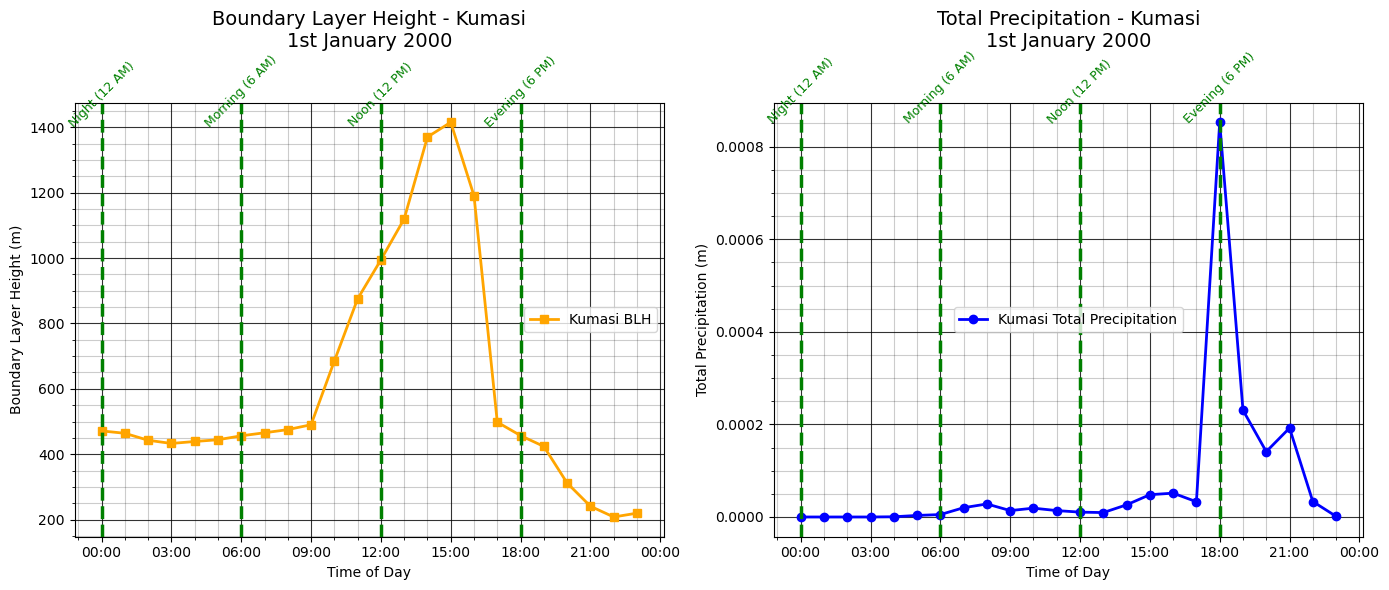

In [38]:

# Create 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Two plots: BLH on left, Precipitation on right

# ===============================
# Plot 1: Boundary Layer Height - Kumasi
# ===============================
kumasi.plot(ax=axs[0], label='Kumasi BLH', color='orange', marker='s', linewidth=2)
axs[0].set_title('Boundary Layer Height - Kumasi\n1st January 2000', fontsize=14, pad=40)
axs[0].set_xlabel('Time of Day')
axs[0].set_ylabel('Boundary Layer Height (m)')
axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axs[0].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
axs[0].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
axs[0].legend()

# Diurnal markers on BLH plot
diurnal_times = {
    'Night (12 AM)': kumasi.valid_time.values[0],
    'Morning (6 AM)': kumasi.valid_time.values[0] + np.timedelta64(6, 'h'),
    'Noon (12 PM)': kumasi.valid_time.values[0] + np.timedelta64(12, 'h'),
    'Evening (6 PM)': kumasi.valid_time.values[0] + np.timedelta64(18, 'h')
}
for label, time in diurnal_times.items():
    axs[0].axvline(time, color='green', linestyle='--', linewidth=2.5)
    axs[0].text(time, axs[0].get_ylim()[1]*0.95, label, rotation=45, fontsize=9, color='green', ha='center')

# ===============================
# Plot 2: Total Precipitation - Kumasi
# ===============================
kumasi_tp.plot(ax=axs[1], label='Kumasi Total Precipitation', color='blue', marker='o', linewidth=2)
axs[1].set_title('Total Precipitation - Kumasi\n1st January 2000', fontsize=14, pad=40)
axs[1].set_xlabel('Time of Day')
axs[1].set_ylabel('Total Precipitation (m)')
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axs[1].xaxis.set_minor_locator(mdates.HourLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].grid(True, which='major', color='black', linestyle='-', alpha=0.8)
axs[1].grid(True, which='minor', color='black', linestyle='-', alpha=0.2)
axs[1].legend()

# Diurnal markers on Precip plot
for label, time in diurnal_times.items():
    axs[1].axvline(time, color='green', linestyle='--', linewidth=2.5)
    axs[1].text(time, axs[1].get_ylim()[1]*0.95, label, rotation=45, fontsize=9, color='green', ha='center')

# Layout and display
plt.tight_layout()
plt.show()


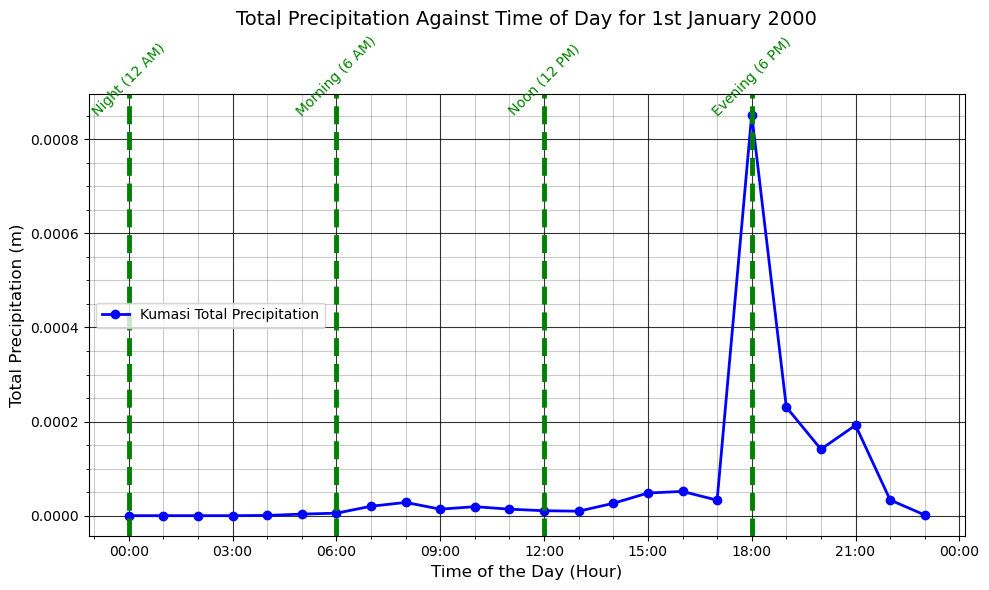

In [36]:
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches wide, 6 inches in height.

#Plot temperature data
kumasi_tp.plot(label='Kumasi Total Precipitation', color='blue', marker='o', linewidth=2)  # Plot Navrongo data with a blue line, circular markers, and line width of 2

#tema1_tp.plot(label='Tema Total Precipitation', color='red', marker='s', linewidth=2)  # Plot Tema data with a red line, square markers, and line width of 2


plt.title('Total Precipitation Against Time of Day for 1st January 2000', fontsize=14, pad=50)  # Set plot title with font size 14 and padding of 50
                                                                             # - pad=50 adds space above the title to avoid overlap with the plot

plt.xlabel('Time of the Day (Hour)', fontsize=12)  # Label x-axis with font size 12

plt.ylabel('Total Precipitation (m)', fontsize=12)  # Label y-axis with font size 12



ax = plt.gca()  # - plt.gca() (get current axis) retrieves the axes object created by xarray’s .plot() method for customization
                # - Allows direct manipulation of axis properties like ticks, grid, and annotations

# Format time on x-axis
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3)) # - mdates.HourLocator(interval=3) places major ticks at 3-hour intervals on the xaxis
                                                           # - Matches the dataset’s 12 AM to 12 AM time range

ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1)) # - Adds minor ticks at 1-hour intervals for detailed analysis.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # - Converts x-axis tick labels to time-of-day format (hours:minutes)
                                                             # - Since the dataset spans one day, only the time part is shown, ignoring the date


ax.yaxis.set_minor_locator(AutoMinorLocator())  # Add minor ticks on the y-axis automatically
                                                # - Enhances readability of boundary layer height values without manually specifying tick locations


ax.grid(True, which='major', color='black', linestyle='-', alpha=0.8)  # Add major grid with black solid lines and 80% opacity

ax.grid(True, which='minor', color='black', linestyle='-', alpha=0.2)  # Add minor grid with black solid lines and 20% opacity

# Diurnal key times
diurnal_times = {
    'Night (12 AM)': kumasi.valid_time.values[0],                            # 12:00 AM (start of the dataset)
    'Morning (6 AM)': kumasi.valid_time.values[0] + np.timedelta64(6, 'h'),  # 6:00 AM
    'Noon (12 PM)': kumasi.valid_time.values[0] + np.timedelta64(12, 'h'),   # 12:00 PM
    'Evening (6 PM)': kumasi.valid_time.values[0] + np.timedelta64(18, 'h')  # 6:00 PM
}
# - Defines a dictionary mapping diurnal time labels to numpy.datetime64 objects
# - navrongo1.valid_time.values[0] is the first time in the dataset, 12:00 AM (2020-01-01T00:00:00)
# - np.timedelta64(X, 'h') adds X hours to the starting time (a numpy.datetime64 object)
# - Since the dataset spans 12 AM to 12 AM, these times align with the x-axis

# Add vertical lines for diurnal times
for label, time in diurnal_times.items():  # Iterate through the diurnal_times dictionary
    ax.axvline(time, color='green', linestyle='--', linewidth=3.5)  # - ax.axvline() draws a vertical line across the plot at the specified x-axis value (time)

    ax.text(time, ax.get_ylim()[1] * 0.95, label, rotation=45, fontsize=10, color='green', ha='center')  # Add a text label
    # - Places the label (e.g., 'Morning (6 AM)') at the specified time, at 95% of the y-axis height
    # - rotation=45 tilts the text for readability
    # - fontsize=10 and color='green' match the line style; ha='center' centers the text on the line



plt.legend()                             # Add a legend to identify Navrongo and Tema lines
plt.tight_layout()                       # Adjust layout to prevent clipping of labels and ensure proper spacing
plt.show()                               # Display the plot 


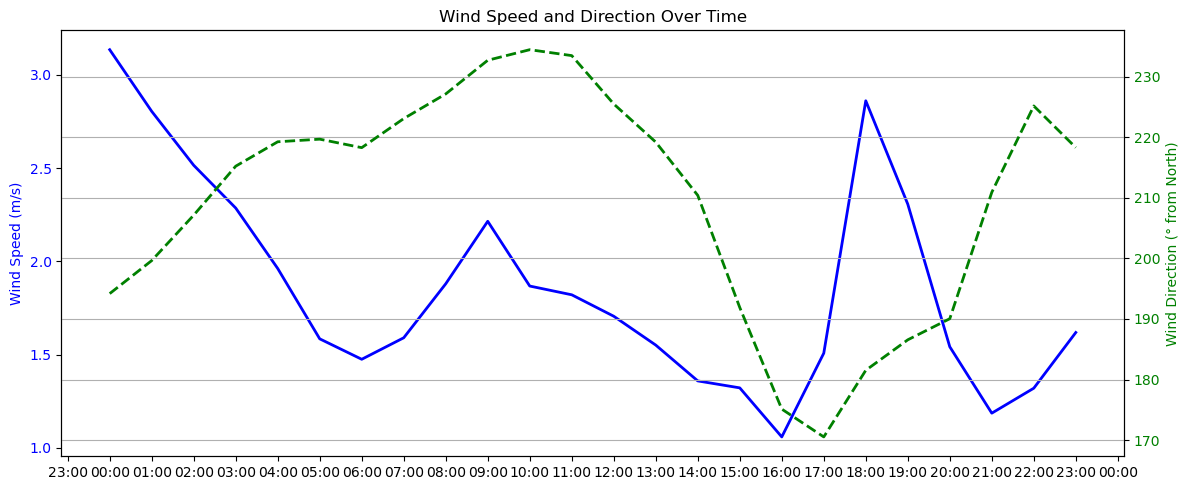

In [45]:

wind_speed = np.sqrt(u10**2 + v10**2)
wind_dir = (np.arctan2(-u10, -v10) * 180 / np.pi) % 360  # Convert to degrees
fig, ax1 = plt.subplots(figsize=(12, 5))

# Wind speed
ax1.plot(valid_times, wind_speed, label='Wind Speed (m/s)', color='blue', linewidth=2)
ax1.set_ylabel('Wind Speed (m/s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Twin axis for direction
ax2 = ax1.twinx()
ax2.plot(valid_times, wind_dir, label='Wind Direction (°)', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Wind Direction (° from North)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.title("Wind Speed and Direction Over Time")
plt.grid(True)
fig.tight_layout()
plt.show()

